In [8]:
## Import necessary modules
import pygmt
import pandas as pd
#pd.set_option('display.max_rows', None)

In [31]:
## Set input data file
## Format input file "Code Lat Long H Ve sVe Vn sVn Vu sVu" with this header line
vel1_df = pd.read_csv("data/velall.txt", sep=" ")
vel2_df = pd.read_csv("data/velall.txt", sep=" ")

## set dataframes to variables vel1 vel2
vel1 = vel1_df[['Long','Lat', 'Ve','Vn', 'sVe','sVn','sVu', 'Code']]
vel2 = vel2_df[['Long','Lat', 'Ve','Vn', 'sVe','sVn','sVu', 'Code']]
#vel1
#vel2

## create scale dataframe for vector magnitude
vsc={
    'Long': [24.25],
    'Lat': [37.60],
    'Ve': [50],
    'Vn': [1],
    'sVe': [1],
    'sVn': [1],
    'sV': [0],
    'Code': ['50 mm']
}

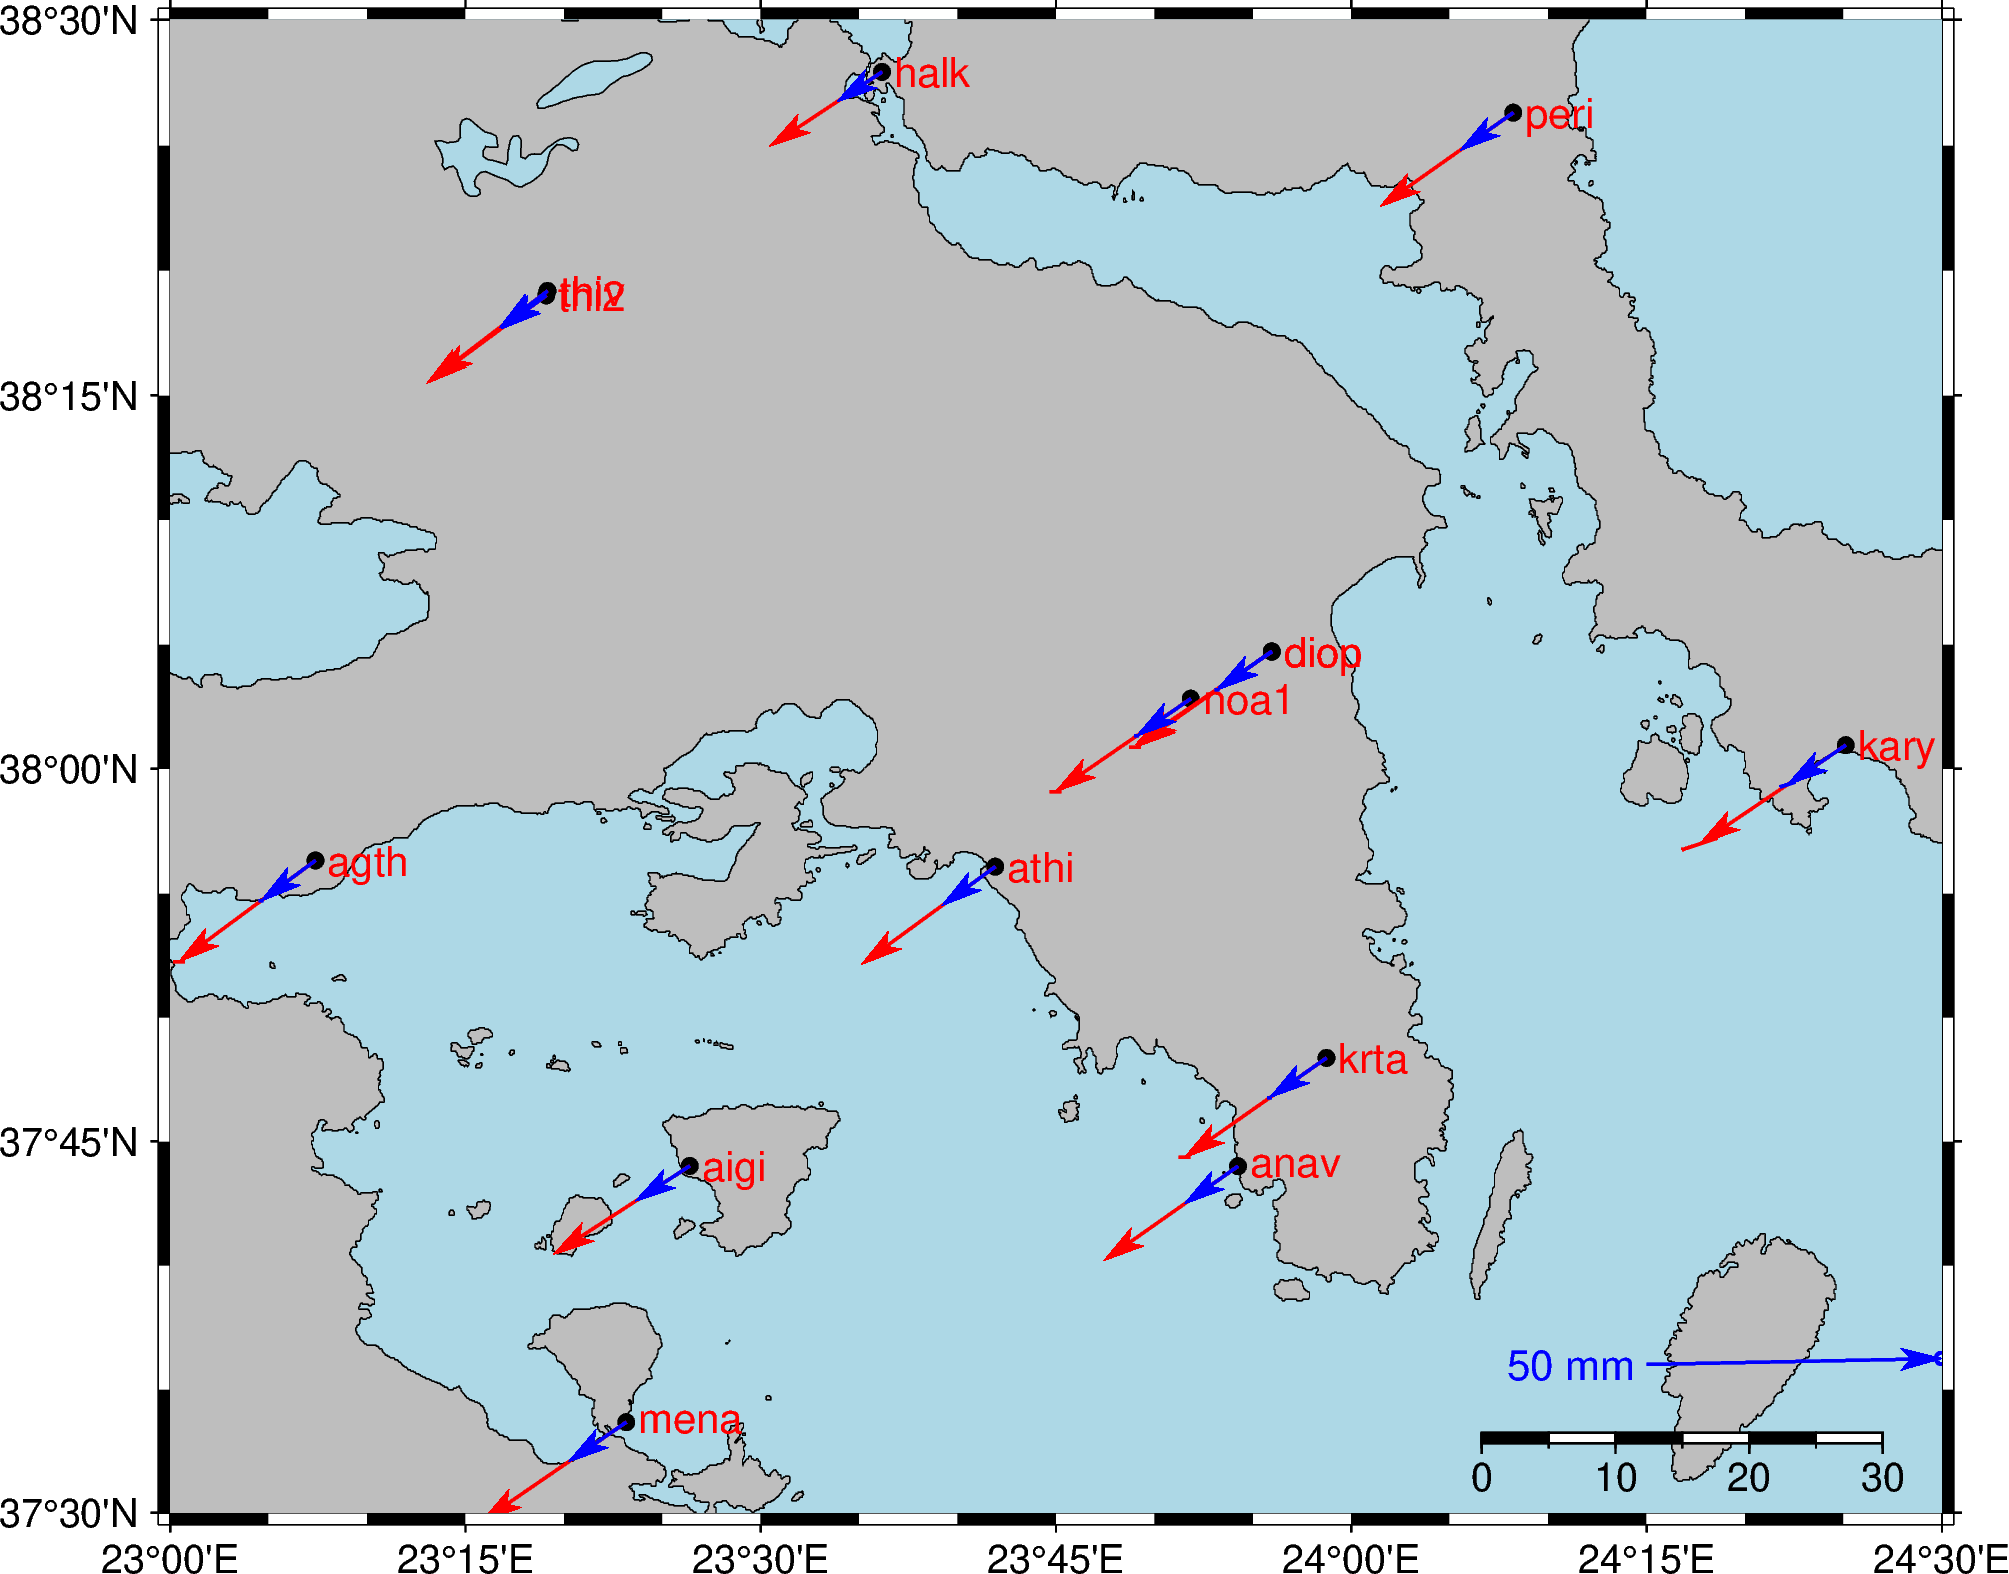

In [33]:
fig = pygmt.Figure()
fig.basemap(
    region=[23, 24.5, 37.5, 38.5],
    projection="M15c",
    frame=True
)

#r=pygmt.makecpt(C="gray", T="-1500/1500",Z=True)
#grid = pygmt.grdclip(grid, below=[0, -2000])
#fig.grdimage(grid="earth_relief_15s.grd", C=r, region=[23, 24.5, 37.5, 38.5],  E=100)


#fig.grdimage(grid="earth_relief_15s.grd", cmap="geo", region=[23, 24.5, 37.5, 38.5],  E=150)

fig.coast(
    shorelines=True,
    land="grey",
    water="lightblue",
    map_scale="jBR+w30k+o0.5c/0.5c+f"
)

#r=pygmt.makecpt(C="gebco", T="-1500/1500",Z=True)
#fig.grdimage(grid="earth_relief_15s.grd", C=r, region=[23, 24.5, 37.5, 38.5],  E=100)
# store focal mechanisms parameters in a dict
# focal_mechanism = dict(strike=330, dip=30, rake=90, magnitude=3)

# pass the focal mechanism data to meca in addition to the scale and event
# location
# fig.meca(focal_mechanism, scale="1c", longitude=23.5, latitude=36, depth=12.0)

fig.plot(x=vel1.Long, y=vel1.Lat, style="c0.15c", color="black")

fig.velo(
    data=vel1,
    pen="0.7p,red",
    uncertaintycolor  ="lightblue1",
    line=True,
    spec="e0.05/0.39/10",
    frame=["WSne"],
    vector="0.35c+e+gred",
)


fig.velo(
    data=vel2,
    pen="0.7p,blue",
    uncertaintycolor  ="lightblue1",
    line=True,
    spec="e0.02/0.39/0",
    frame=["WSne"],
    vector="0.35c+e+gblue",
)

fig.velo(
    data=vsc,
    pen="0.7p,blue",
    uncertaintycolor  ="lightblue1",
    line=True,
    spec="e0.05/0.39/10",
    frame=["WSne"],
    vector="0.35c+e+gblue",
)

fig.show()

In [39]:
fig.savefig("test.png")